<br>
<br>
<div align="center">
<font size="8">
<span style="color:Blue">Machine Learning Lab</span>
</font>
</div>

---

<font size="5">
<div align='center'>Name : Aman Kumar Gupta</div>
    <br>
<div align='center'>Roll No.: BTech/25013/18</div>
    <br>
<div align='center'>Branch : CSE</div>
    <br>
<div align='center'>Semester : 6</div>
    <br>
</font>

---

# Decision Tree

**Aim :-** 5.	Write a program to demonstrate the working of the decision tree based on following alogirthm.<br>
a.)	ID3 algorithm. <br>
b.)	CART Algorithm


In [47]:
#import useful package
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score

In [48]:
#read data 
df = pd.read_csv('data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [50]:
#Splitting data in to train and test part

X = df.drop(['Species','Id'],axis=1)
class_name = list(df.Species.unique())
feat_name = list(X.columns)
Y = df.Species.apply(lambda x: class_name.index(x))
#Y = df.Species

In [51]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

---
## Train Model :- ID3


### Algorithm
```
ID3 (Examples, Target_Attribute, Attributes)
    Create a root node for the tree
    If all examples are positive, Return the single-node tree Root, with label = +.
    If all examples are negative, Return the single-node tree Root, with label = -.
    If number of predicting attributes is empty, then Return the single node tree Root,
    with label = most common value of the target attribute in the examples.
    Otherwise Begin
        A ← The Attribute that best classifies examples.
        Decision Tree attribute for Root = A.
        For each possible value, vi, of A,
            Add a new tree branch below Root, corresponding to the test A = vi.
            Let Examples(vi) be the subset of examples that have the value vi for A
            If Examples(vi) is empty
                Then below this new branch add a leaf node with label = most common target value in the examples
            Else below this new branch add the subtree ID3 (Examples(vi), Target_Attribute, Attributes – {A})
    End
    Return Root
    
```

ID3 algorithm is based on entropy and information gain calculation.<br>
Entropy is calculated as
$$
\mathbf{Entropy} = - \Sigma p(X) \log p(X)
$$
<br>
Where `p(X)` is a Fraction of example in given class

and information gain is calculated as-
$$
\mathbf{GAIN} = \mathbf{Entropy(p)} - \Sigma \frac{n_i}{n}\mathbf{Entropy(i)}
$$

In [52]:
cd3 = DecisionTreeClassifier(criterion='entropy')
cd3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

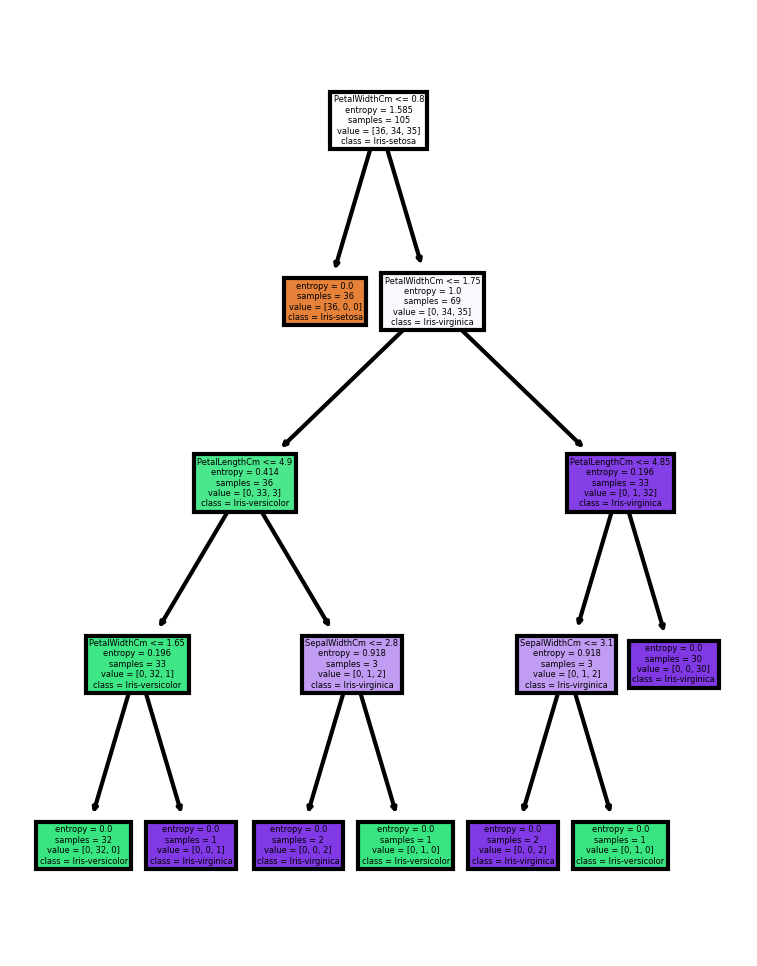

In [53]:
#plot tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,4), dpi=300)
plot_tree(cd3,
         feature_names = feat_name,
          class_names=class_name,
          filled = True);

In [54]:
#check accurecy
y_pred = cd3.predict(x_test)
print(f'Accuracy Score of model is : {accuracy_score(y_test,y_pred)}')

Accuracy Score of model is : 0.9555555555555556


In [55]:
print('Confusion Metrics :')
print(confusion_matrix(y_test,y_pred))

Confusion Metrics :
[[14  0  0]
 [ 0 15  1]
 [ 0  1 14]]


---
## Train Model :- CART


### Algorithm
```
Step 1: Start at the root node with all training instances
Step 2: Select an attribute on the basis of splitting criteria 
Step 3: Partition instances according to selected attribute recursively
    
```

ID3 algorithm is based on GINI Impurity.<br>
GINI is calculated as
$$
\mathbf{GINI} = 1 - \Sigma (p_i)^2
$$
<br>
Where $p_i$ is the probability that a tuple in `D` belongs to the class `C`

In [56]:
cart = DecisionTreeClassifier(criterion='gini')
cart.fit(x_train,y_train)

DecisionTreeClassifier()

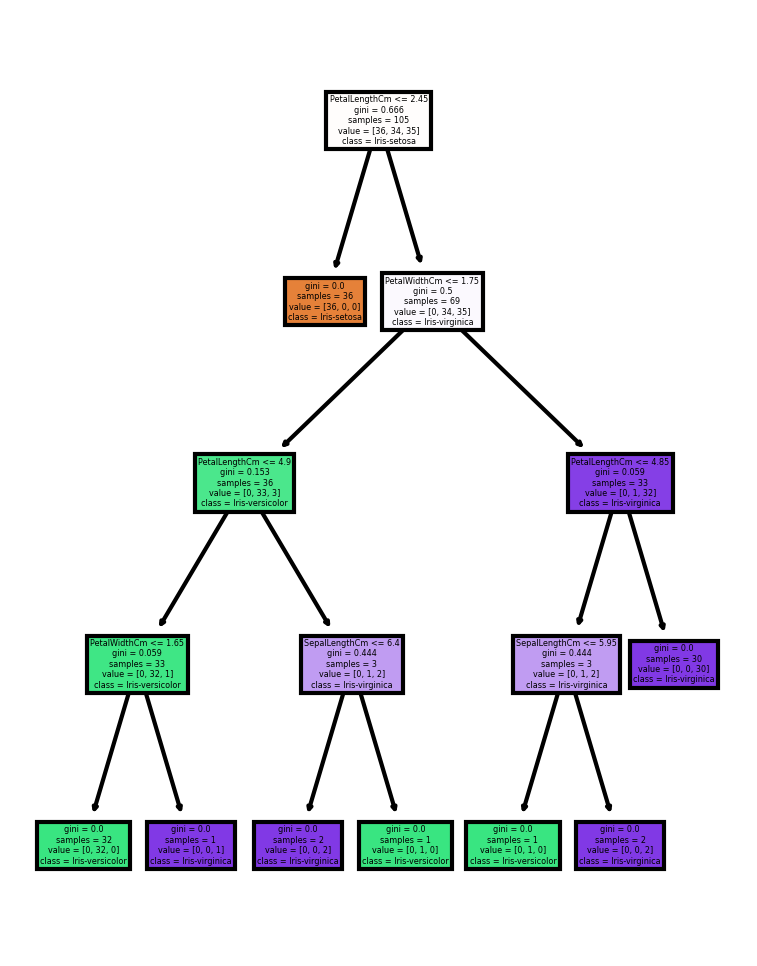

In [57]:
#plot tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,4), dpi=300)
plot_tree(cart,
         feature_names = feat_name,
          class_names=class_name,
          filled = True);

In [58]:
#check accurecy
y_pred = cart.predict(x_test)
print(f'Accuracy Score of model is : {accuracy_score(y_test,y_pred)}')

Accuracy Score of model is : 0.9555555555555556


In [59]:
print('Confusion Metrics :')
print(confusion_matrix(y_test,y_pred))

Confusion Metrics :
[[14  0  0]
 [ 0 15  1]
 [ 0  1 14]]


---

# Logestic Regression

**Aim :-** 	Implement the Logistic regression algorithm  to solve the classification problem for an appropriate dataset. Java/Python ML library classes can be used for this problem.

Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

__For Logestic Regression Output Function :__
$$
\sigma(z) = \mathbf{sigmoid}(z)
$$
Where
$$
z = \beta_0+\beta_1x+\cdots
$$
And
$$
sigmoid(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-{\beta_0+\beta_1x+\cdots}}}
$$

$\sigma(z)$ gives values between 0 and 1.

and Cost Function is :
$$
J(\theta) = -\frac{1}{m}\Sigma\left[y\log{\sigma(z)}+(1-y)\log{(1-\sigma(z))}\right]
$$

To minimise our cost Function we use `Gradient Descent`.

$$
\theta_j := \theta_j - \alpha \sum_{i=1}^{m}(\sigma(x^{(i)})-y^{(i)})x_j^{(i)}
$$

In [60]:
#import useful package
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score

In [61]:
df = pd.read_csv('data/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [63]:
#convert class feature in numerical
g_list = ['Male','Female']
df.Gender = df.Gender.apply(lambda x: g_list.index(x))


In [64]:
#Splitting Data in train and test
X = df.drop(['User ID','Purchased'],axis = 1)
Y = df['Purchased']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

In [65]:
#Training Logestic Regression Model
LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)

LogisticRegression()

In [66]:
print("Coefficient for Regression:")
print(*LogReg.coef_[0],sep = '\n')

Coefficient for Regression:
-9.322295567048426e-11
-2.1041517809748262e-09
-2.693014040541572e-06


In [67]:
#Test accurecy
y_pred = LogReg.predict(x_test)

print(f'Accurecy = {accuracy_score(y_test,y_pred)}')

Accurecy = 0.6666666666666666


---

## Support vector machine


**Aim :-** Impelement the Support vector machine algorithm for supervised learning to solve the classification problem. Java/Python ML library classes can be used for this problem.

In the SVM algorithm, we are looking to maximize the margin between the data points and the hyperplane. 
### Cost Function :
$$
C(x,y,f(x)) =
\left\{
	\begin{array}{ll}
		0  & \mbox{if } y*f(x) \geq 1 \\
		1-y*f(x) & \mbox{else } 
	\end{array}
\right.
$$

We also add a regularization parameter in the cost function. The objective of the regularization parameter is to balance the margin maximization and loss. After adding the regularization parameter, the cost functions looks as below.

$$
min_w \lambda ||w||^2 + \sum_{i=1}^{n} (1-y_i⟨x_i,w⟩)_+
$$

Now that we have the loss function, we take partial derivatives with respect to the weights to find the gradients. Using the gradients, we can update our weights.

$$
\frac{\delta}{\delta w_k} \lambda \|w\|^2 = 2 \lambda w_k
$$

When there is no misclassification, i.e our model correctly predicts the class of our data point, we only have to update the gradient from the regularization parameter.

$$
\omega = \omega - \alpha \cdot (2\lambda \omega)
$$

When there is a misclassification,we include the loss along with the regularization parameter to perform gradient update.

$$
\omega = \omega - \alpha \cdot (y_i \cdot x_i -2\lambda \omega)
$$

---

### 1. Import Package and read Data

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC

In [69]:
df = pd.read_csv("data/UniversalBank.csv")

In [70]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [71]:
df = pd.get_dummies(df,drop_first=True, columns=['Family','Education'])
df.head()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,1,25,1,49,91107,1.6,0,0,1,0,0,0,0,0,1,0,0
1,2,45,19,34,90089,1.5,0,0,1,0,0,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,0,0,0,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,2.7,0,0,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,1.0,0,0,0,0,0,1,0,0,1,1,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  Family_2            5000 non-null   uint8  
 13  Family_3            5000 non-null   uint8  
 14  Family_4            5000 non-null   uint8  
 15  Education_2         5000 non-null   uint8  
 16  Educat

### 2. Split Data in Training and Testing Set

In [73]:
X = df.drop(['ID','ZIP Code','CreditCard'],axis=1)
Y = df['CreditCard']

In [74]:
x_train,x_test,y_train,y_test = train_test_split(X,Y)

### 3. Create SVM model and train

In [75]:
svc_ = SVC(gamma='auto')
svc_.fit(x_train,y_train)

SVC(gamma='auto')

In [76]:
svc_.predict([x_test.iloc[0]])

array([0], dtype=int64)

### 4. Test Accuracy

In [77]:
y_pred = svc_.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
con_mat = confusion_matrix(y_test,y_pred)

print(f'Accuracy of Model is {accuracy} .')
print(f'Confusion Matrix :\n{con_mat}')

Accuracy of Model is 0.68 .
Confusion Matrix :
[[847  38]
 [362   3]]


---

# K-Nearest Neighbors

**Aim :-** Write a program to implement k-Nearest Neighbor algorithm to classify the iris data set. Print both correct and wrong predictions. Java/Python ML library classes can be used for this problem.

### Algorithm 

```
1.Load the data
2.Initialize K to your chosen number of neighbors
3. For each example in the data
    1. Calculate the distance between the query example and the current example from the data.
    2. Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels
```

### 1. Import useful package

In [78]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt


### 2. Load dataset and make dataframe

In [79]:
df = load_iris()

In [80]:
data = np.append(df.data,df.target.reshape((150,1)),axis=1)
columns = list(df.feature_names)+['target']
dataframe = pd.DataFrame(data = data,columns=columns)
dataframe.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### 3. Split data in Training and testing set

In [81]:
X = df.data
Y = df.target

In [82]:

x_train,x_test,y_train,y_test = train_test_split(X,Y)

### 4. Create Model and Train

In [83]:
knn = KNeighborsClassifier(n_neighbors=4)

In [84]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [85]:
p = knn.predict([x_train[0]])
print(df.target_names[p])

['virginica']


### 5. Accuracy and confusion matrix

In [86]:
y_p = knn.predict(x_test)
acc = accuracy_score(y_test,y_p)
con_mat = confusion_matrix(y_test,y_p)
print(f'Accuracy Score = {acc} .')
print(f'Confusion Matrix :\n{con_mat}')

Accuracy Score = 0.9736842105263158 .
Confusion Matrix :
[[10  0  0]
 [ 0 11  1]
 [ 0  0 16]]


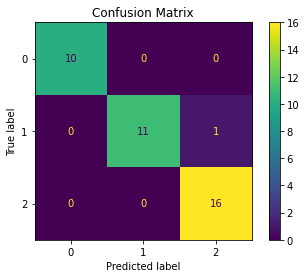

In [87]:
plot_confusion_matrix(knn, x_test, y_test) 
plt.title('Confusion Matrix')
plt.show()

---